In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Preparation


In [2]:
df = pd.read_csv("C:/Users/Evang/Downloads/garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [3]:
print(df.dtypes)

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the count of missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [6]:
df['wip'] = df['wip'].fillna(df['wip'].median())

# Check if the missing values have been replaced
print(df.isnull().sum())

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


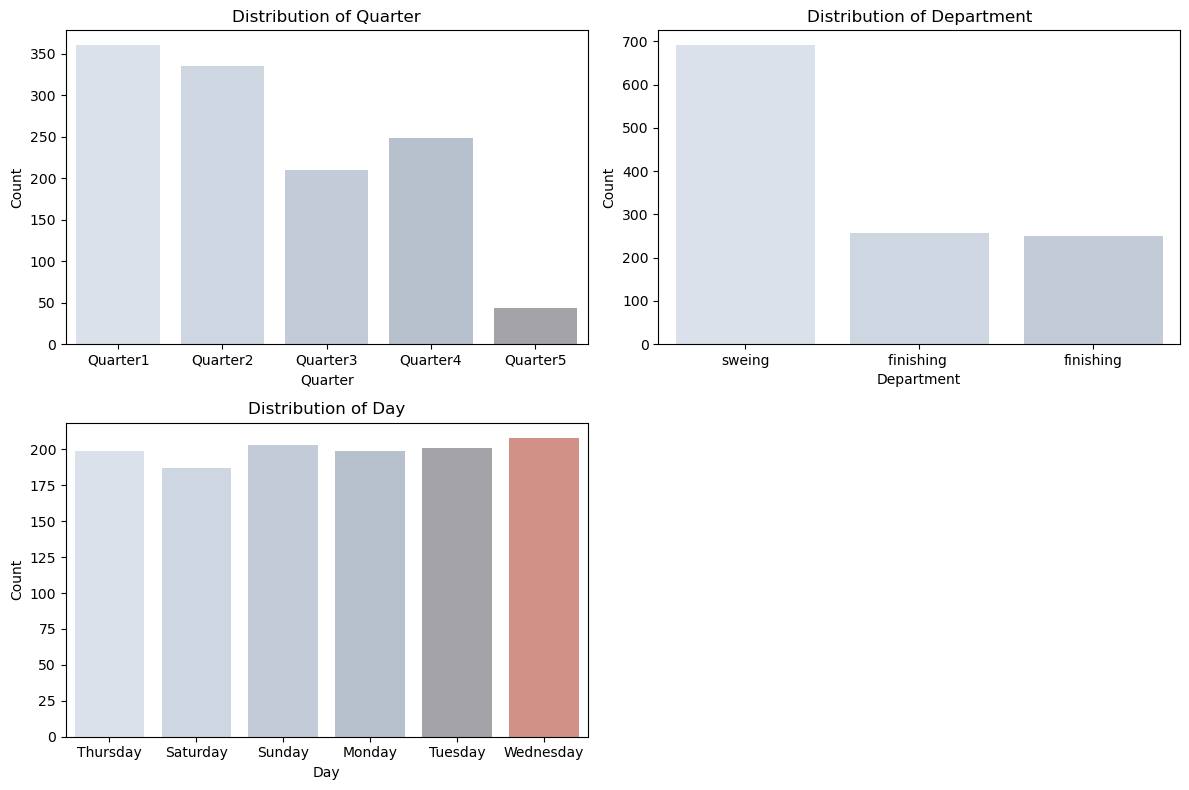

In [7]:
# Set figure size
plt.figure(figsize=(12, 8))

# Bar chart for 'quarter'
plt.subplot(2, 2, 1)
sns.countplot(x='quarter', data=df, palette=["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"])
plt.title('Distribution of Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')

# Bar chart for 'department'
plt.subplot(2, 2, 2)
sns.countplot(x='department', data=df, palette=["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"])
plt.title('Distribution of Department')
plt.xlabel('Department')
plt.ylabel('Count')

# Bar chart for 'day'
plt.subplot(2, 2, 3)
sns.countplot(x='day', data=df, palette=["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"])
plt.title('Distribution of Day')
plt.xlabel('Day')
plt.ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Exploratory Data Analysis (EDA)

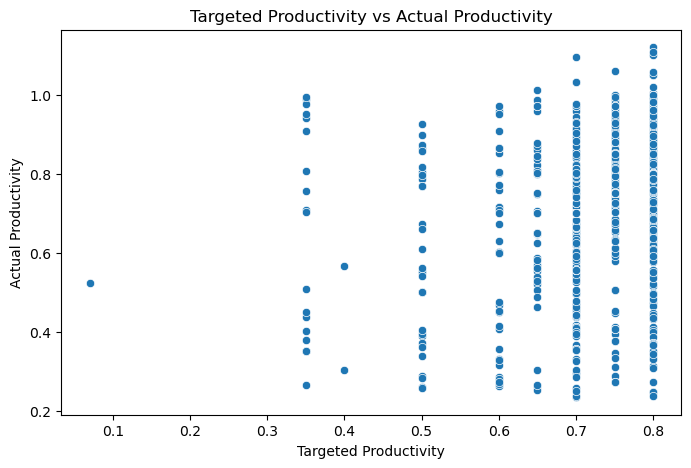

In [8]:
# Scatter plot for targeted vs actual productivity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='targeted_productivity', y='actual_productivity')
plt.title('Targeted Productivity vs Actual Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')
plt.show()


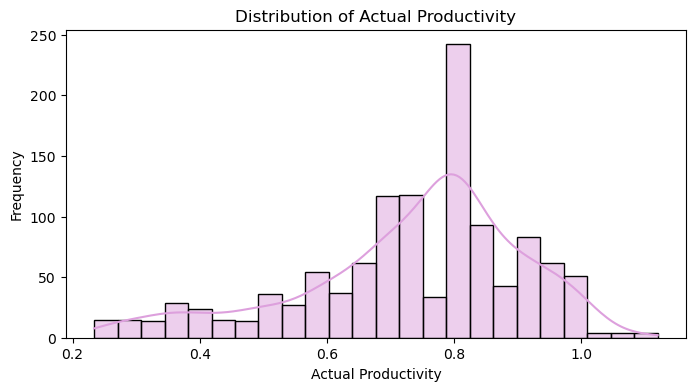

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set inline plotting for Jupyter notebooks
%matplotlib inline

# Plot the distribution of the 'actual_productivity' column
plt.figure(figsize=(8, 4))
sns.histplot(df['actual_productivity'], kde=True, color='plum', edgecolor="k", linewidth=1)
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()


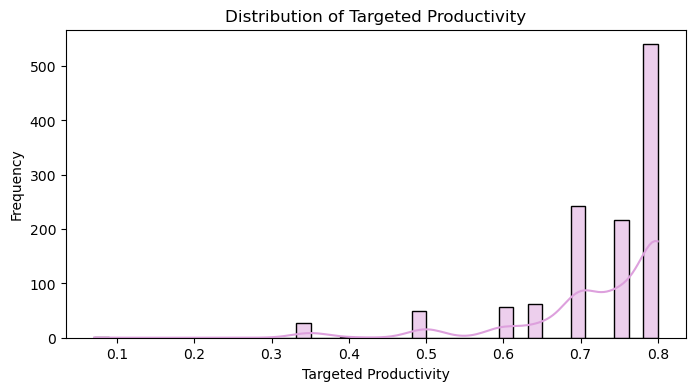

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set inline plotting for Jupyter notebooks
%matplotlib inline

# Plot the distribution of the 'actual_productivity' column
plt.figure(figsize=(8, 4))
sns.histplot(df['targeted_productivity'], kde=True, color='plum', edgecolor="k", linewidth=1)
plt.title('Distribution of Targeted Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Frequency')
plt.show()


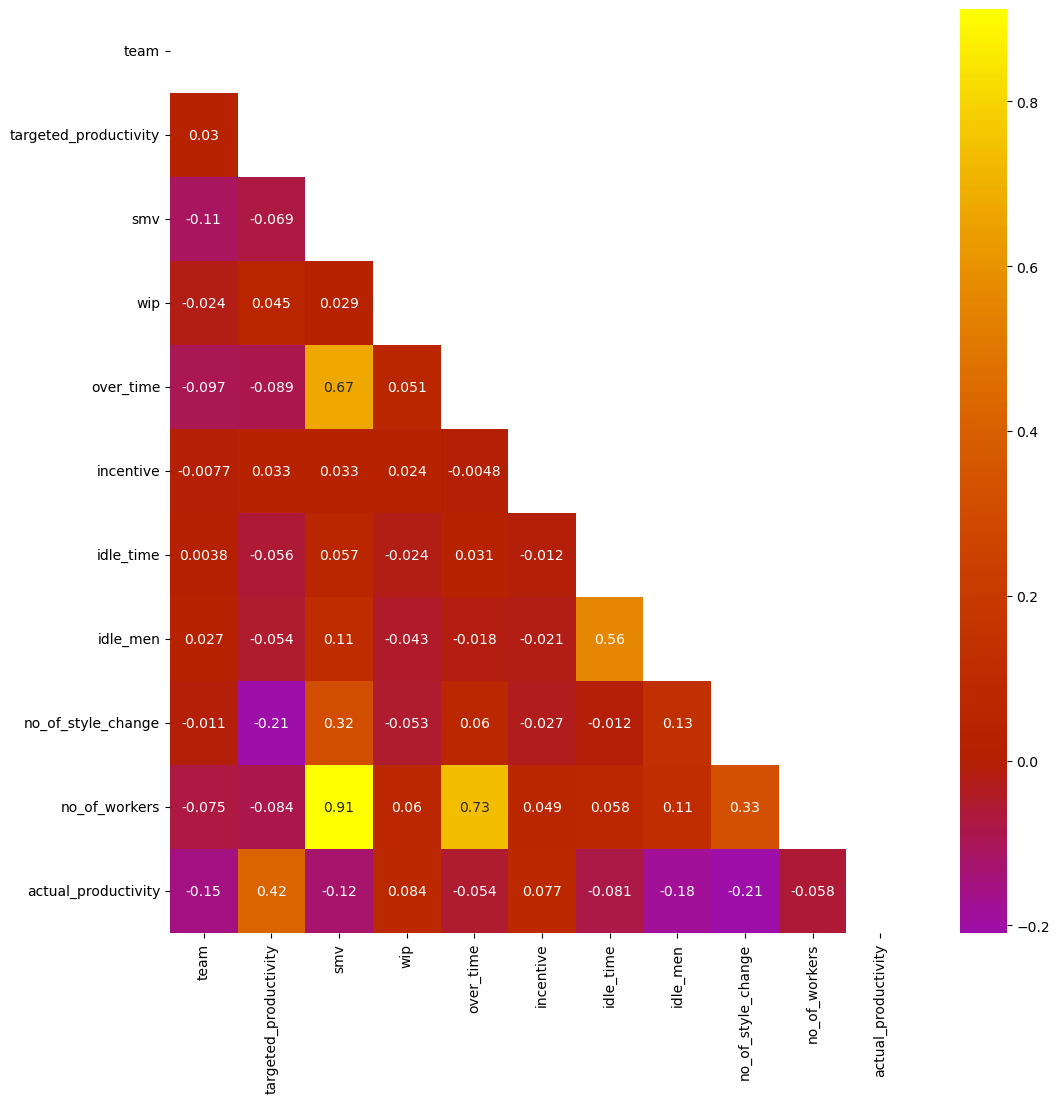

In [11]:
# save correlations to variable
corr = df.corr()

#create a mask to not show duplicate values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# generate heatmap
plt.figure(figsize= (12,12))
sns.heatmap(corr, annot=True, center=0, mask=mask, cmap='gnuplot')
plt.show()

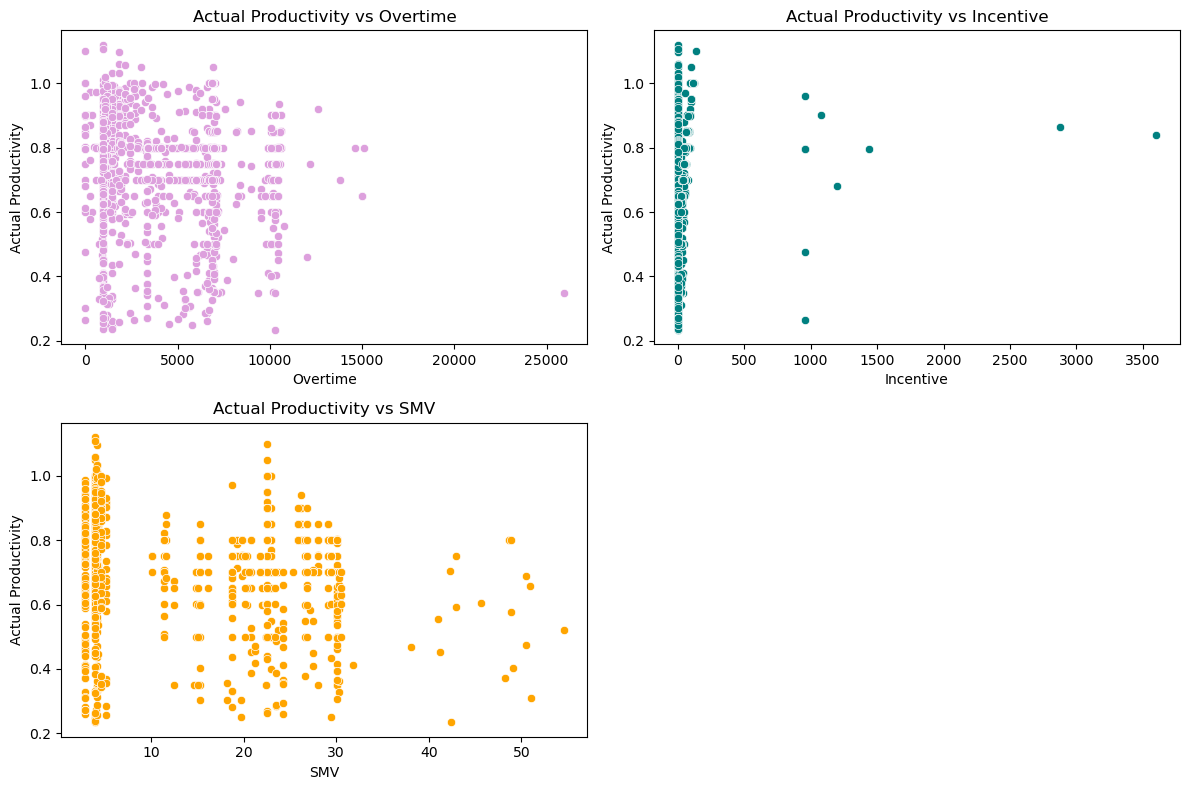

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot to visualize relationships between actual_productivity and other variables
plt.figure(figsize=(12, 8))

# Scatterplot: actual_productivity vs overtime
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='over_time', y='actual_productivity', color='plum')
plt.title('Actual Productivity vs Overtime')
plt.xlabel('Overtime')
plt.ylabel('Actual Productivity')

# Scatterplot: actual_productivity vs incentive
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='incentive', y='actual_productivity', color='teal')
plt.title('Actual Productivity vs Incentive')
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')

# Scatterplot: actual_productivity vs smv
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='smv', y='actual_productivity', color='orange')
plt.title('Actual Productivity vs SMV')
plt.xlabel('SMV')
plt.ylabel('Actual Productivity')

plt.tight_layout()
plt.show()




### Data Preprocessing

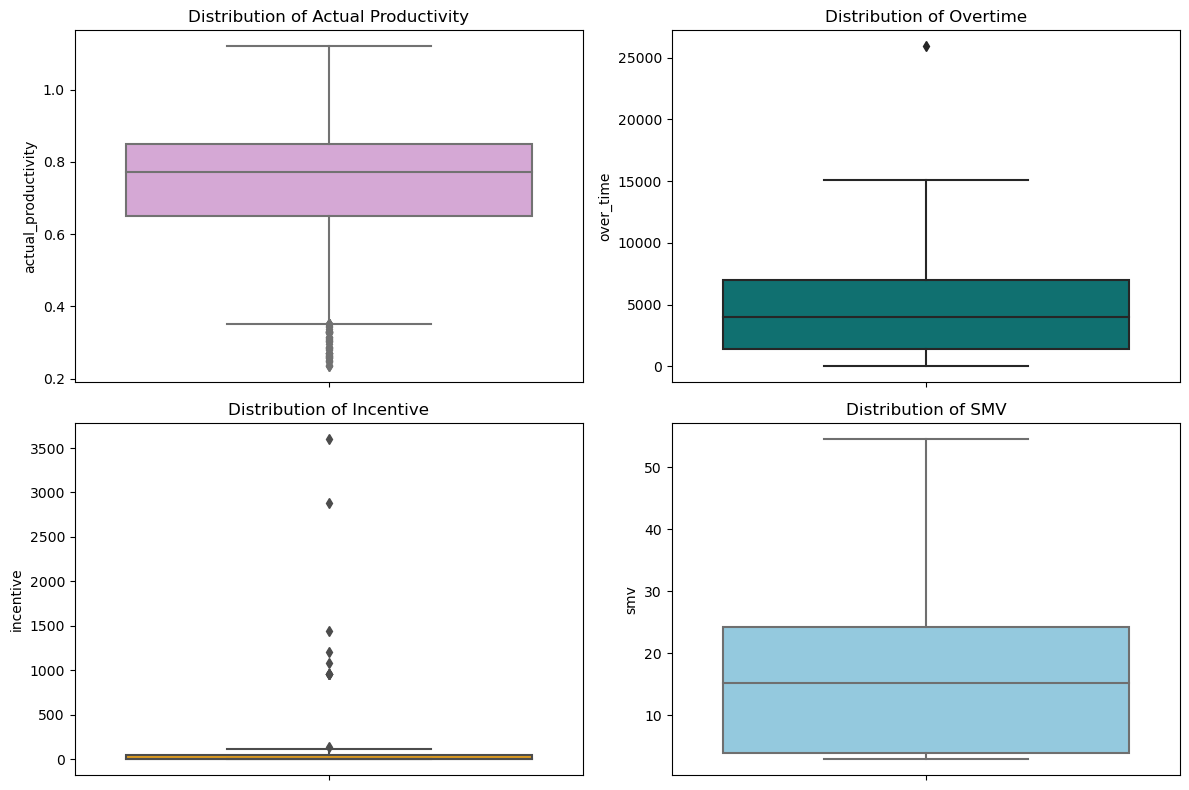

In [13]:
# Boxplot to visualize distributions and potential outliers for each variable
plt.figure(figsize=(12, 8))

# Boxplot: actual_productivity
plt.subplot(2, 2, 1)
sns.boxplot(data=df, y='actual_productivity', color='plum')
plt.title('Distribution of Actual Productivity')

# Boxplot: overtime
plt.subplot(2, 2, 2)
sns.boxplot(data=df, y='over_time', color='teal')
plt.title('Distribution of Overtime')

# Boxplot: incentive
plt.subplot(2, 2, 3)
sns.boxplot(data=df, y='incentive', color='orange')
plt.title('Distribution of Incentive')

# Boxplot: smv
plt.subplot(2, 2, 4)
sns.boxplot(data=df, y='smv', color='skyblue')
plt.title('Distribution of SMV')

plt.tight_layout()
plt.show()

In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[['actual_productivity', 'over_time', 'incentive', 'smv']].quantile(0.25)
Q3 = df[['actual_productivity', 'over_time', 'incentive', 'smv']].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering values that fall within the bounds
df_clean = df[~((df[['actual_productivity', 'over_time', 'incentive', 'smv']] < lower_bound) | (df[['actual_productivity', 'over_time', 'incentive', 'smv']] > upper_bound)).any(axis=1)]

# Verify if outliers were removed
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")


Original shape: (1197, 15)
Cleaned shape: (1133, 15)


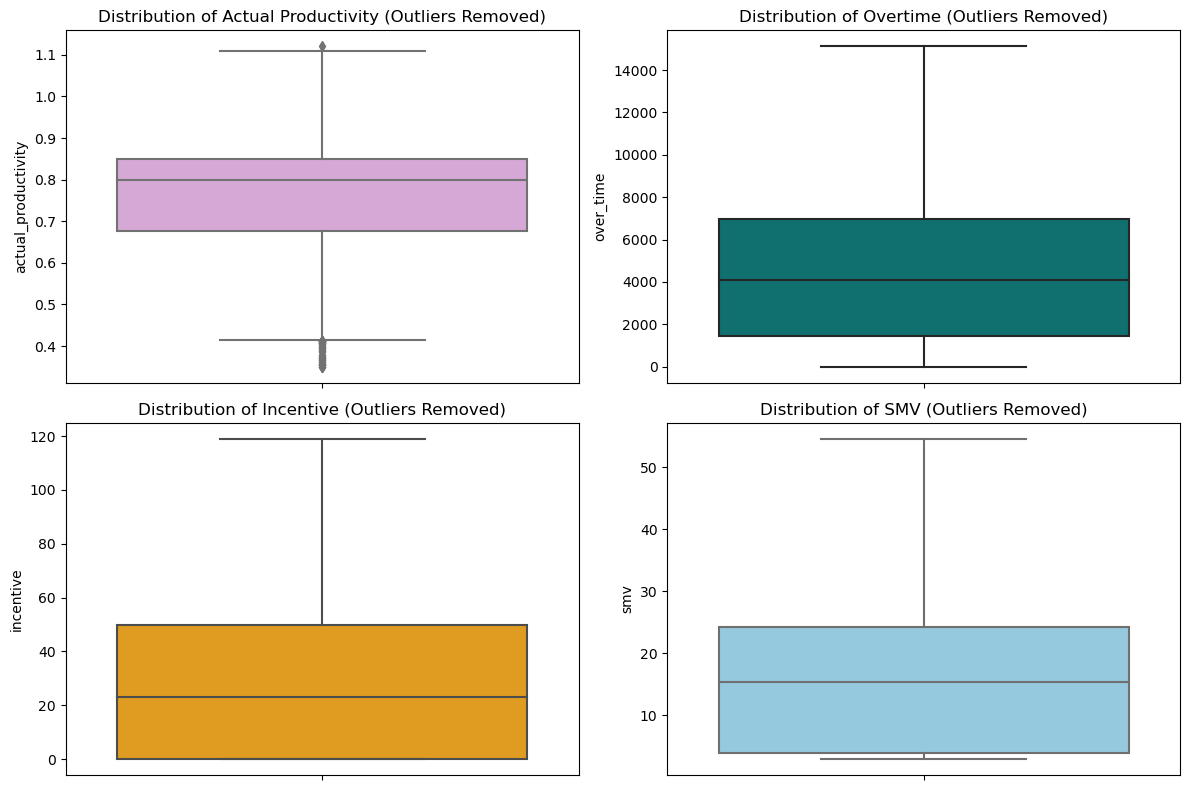

In [15]:
# You can now replot the boxplots after cleaning the data
plt.figure(figsize=(12, 8))

# Boxplot: actual_productivity
plt.subplot(2, 2, 1)
sns.boxplot(data=df_clean, y='actual_productivity', color='plum')
plt.title('Distribution of Actual Productivity (Outliers Removed)')

# Boxplot: overtime
plt.subplot(2, 2, 2)
sns.boxplot(data=df_clean, y='over_time', color='teal')
plt.title('Distribution of Overtime (Outliers Removed)')

# Boxplot: incentive
plt.subplot(2, 2, 3)
sns.boxplot(data=df_clean, y='incentive', color='orange')
plt.title('Distribution of Incentive (Outliers Removed)')

# Boxplot: smv
plt.subplot(2, 2, 4)
sns.boxplot(data=df_clean, y='smv', color='skyblue')
plt.title('Distribution of SMV (Outliers Removed)')

plt.tight_layout()
plt.show()

### Machine Learning Model and Evaluation

In [16]:
print(df['quarter'].unique())
print(df['department'].unique())
df['department'] = df['department'].str.strip()



['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
['sweing' 'finishing ' 'finishing']


In [17]:
# Convert 'day' column to boolean
df['day'] = df['day'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Saturday':5, 'Sunday': 6})
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['quarter'] = df['quarter'].map({'Quarter1': 1, 'Quarter2': 2, 'Quarter3': 3, 'Quarter4': 4, 'Quarter5':5})
df['department'] = df['department'].map({'sweing': 1, 'finishing': 2})

In [18]:
#Data Splitting
X = df.drop(columns=['actual_productivity', 'date'])  # Features
y = df['actual_productivity']  # Target variable


In [19]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
# Select columns for scaling (continuous numerical columns only)
columns_to_scale = X_train.select_dtypes(include=[np.number]).columns.difference(['day', 'quarter', 'department'])
scaler = StandardScaler()

# Apply StandardScaler only on continuous numerical columns
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [21]:
# For pandas DataFrames or Series, use the .dtypes attribute
print("Data types of X_train:")
print(X_train.dtypes)

print("\nData types of X_test:")
print(X_test.dtypes)

print("\nData types of y_train:")
print(y_train.dtypes)

print("\nData types of y_test:")
print(y_test.dtypes)

Data types of X_train:
quarter                    int64
department                 int64
day                        int64
team                     float64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                float64
incentive                float64
idle_time                float64
idle_men                 float64
no_of_style_change       float64
no_of_workers            float64
dtype: object

Data types of X_test:
quarter                    int64
department                 int64
day                        int64
team                     float64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                float64
incentive                float64
idle_time                float64
idle_men                 float64
no_of_style_change       float64
no_of_workers            float64
dtype: object

Data types of y_train:
float64

Data types of y_test:
float64


In [31]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1)  # Adjusted to ensure valid range
}

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
model = xgb.XGBRegressor(objective="reg:squarederror")

# Initialize GridSearchCV with cross-validation
grid_search =RandomizedSearchCV(
    estimator=XGBRegressor(),
    param_distributions=param_dist_xgb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_iter=50,  # Number of random configurations to try
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)




Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8999999999999999, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [24]:
y_pred = best_model.predict(X_test)

In [25]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 0.07080667746439694
Mean Squared Error: 0.012747681666224187
Root Mean Squared Error: 0.11290563168515637
R-squared: 0.5199059320954541


<Figure size 1000x800 with 0 Axes>

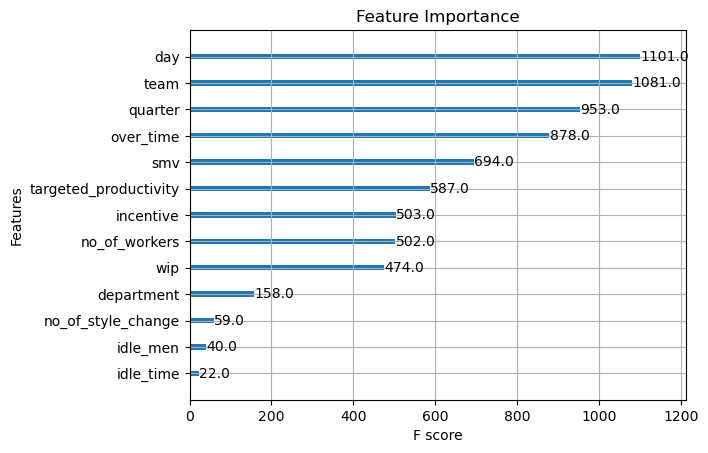

In [26]:
# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_model, importance_type='weight')
plt.title('Feature Importance')
plt.show()

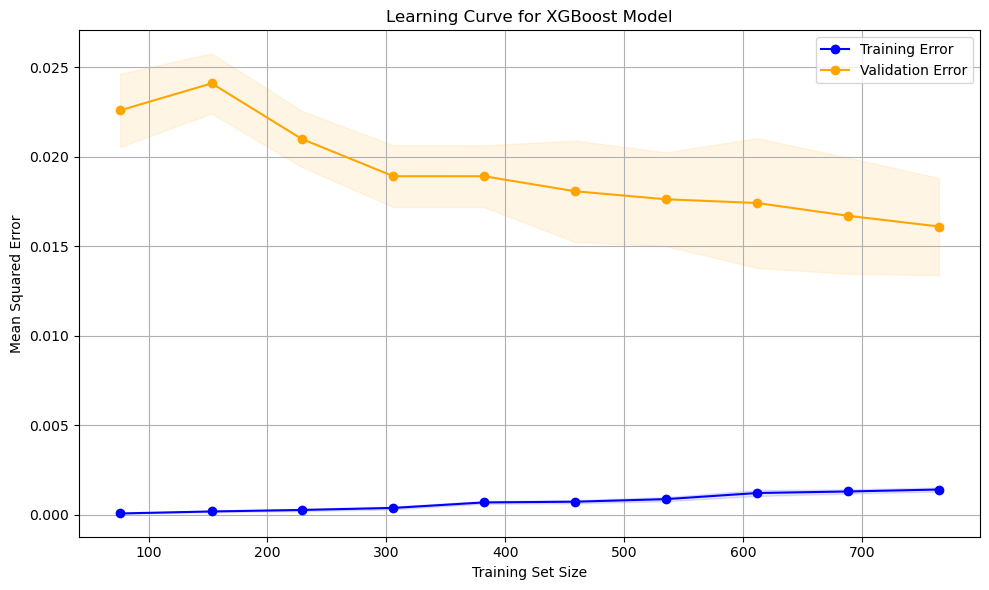

In [27]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the range of training set sizes to evaluate
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,       # Use the best model from grid search
    X=X_train,                  # Training features
    y=y_train,                  # Training target
    train_sizes=train_sizes,    # Sizes of the training set to evaluate
    cv=5,                       # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Calculate mean and standard deviation of train and test scores
train_scores_mean = -np.mean(train_scores, axis=1)  # Convert negative scores to positive MSE
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)    # Convert negative scores to positive MSE
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.1)

plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='orange', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='orange', alpha=0.1)

# Adding titles and labels
plt.title("Learning Curve for XGBoost Model")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
#cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np




In [29]:
# Define the scoring functions
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

# Perform cross-validation with 5-folds for each metric
mae_scores = cross_val_score(best_model, X, y, cv=5, scoring=scoring['MAE'])
mse_scores = cross_val_score(best_model, X, y, cv=5, scoring=scoring['MSE'])
r2_scores = cross_val_score(best_model, X, y, cv=5, scoring=scoring['R2'])

# Convert MSE scores to RMSE by taking the square root
rmse_scores = np.sqrt(-mse_scores)


In [35]:
print(f"Mean Absolute Error (MAE): {-np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"Mean Squared Error (MSE): {-np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"R-squared (R²): {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")


Mean Absolute Error (MAE): 0.0860 ± 0.0138
Mean Squared Error (MSE): 0.0181 ± 0.0042
Root Mean Squared Error (RMSE): 0.1334 ± 0.0167
R-squared (R²): 0.3859 ± 0.0404
